In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectFwe
from tpot.builtins import StackingEstimator
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVR
from sklearn.linear_model import LassoLarsCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline, make_union
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from tpot.export_utils import set_param_recursive
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import re

df= pd.read_csv("gaming_total_v2.csv")
df= df.drop('Unnamed: 0', axis=1)
df_clean=pd.read_csv("df_clean_v2.csv", index_col=0)
df_gd=pd.get_dummies(df_clean)

In [2]:
y=df_gd['Global_Sales']
X=df_gd.drop('Global_Sales', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42)

pipeline = make_pipeline(
    StandardScaler(),
    MinMaxScaler(),
    SelectFwe(score_func=f_regression, alpha=0.009000000000000001),
    StackingEstimator(estimator=RandomForestRegressor(bootstrap=False, max_features=0.25, min_samples_leaf=14, min_samples_split=7, n_estimators=100)),
    VarianceThreshold(threshold=0.1))

set_param_recursive(pipeline.steps, 'random_state', 42)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('minmaxscaler', MinMaxScaler()),
                ('selectfwe',
                 SelectFwe(alpha=0.009000000000000001,
                           score_func=<function f_regression at 0x00000223E44934C0>)),
                ('stackingestimator',
                 StackingEstimator(estimator=RandomForestRegressor(bootstrap=False,
                                                                   max_features=0.25,
                                                                   min_samples_leaf=14,
                                                                   min_samples_split=7,
                                                                   random_state=42))),
                ('variancethreshold', VarianceThreshold(threshold=0.1))])

Score : 
-0.0022821509203316825
R2 : 
-0.0022821509203316825
MSE : 
2.132742910958904
MAE : 
0.680082191780822


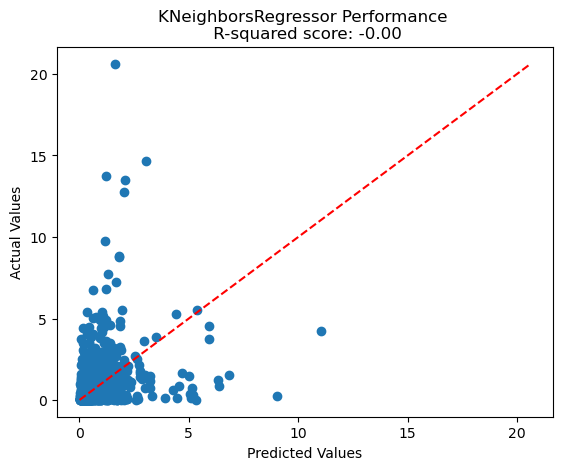

In [4]:
knn=KNeighborsRegressor()

knn.fit(X_train, y_train)
score_p = knn.score(X_test, y_test)
y_pred = knn.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Score : ")
print(score_p)
print("R2 : ")
print(r2)
print("MSE : ")
print(mse)
print("MAE : ")
print(mae)

plt.figure()
plt.scatter(y_pred, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('KNeighborsRegressor Performance \n R-squared score: {:.2f}'.format(r2))
plt.show();

In [16]:
from sklearn.model_selection import GridSearchCV


lr=LinearRegression()
param_grid = {'fit_intercept': [True, False], 'copy_X': [True, False], 'n_jobs': [-1, 10, 1], 'positive': [True, False] } 
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_param=grid_search.best_params_
score=grid_search.best_score_

In [18]:
score

-2.031300268984781

In [21]:
from sklearn.neighbors import Random
regressor = KNeighborsRegressor()

params = regressor.get_params()
params

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}